<a href="https://colab.research.google.com/github/anwishn/HoPy/blob/main/ch21_CNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%9D%B8%EC%8B%9D_%EA%B8%B0%EC%B4%88_ch22_CNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%9D%B8%EC%8B%9D_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬으로 배우는 딥러닝 교과서 ch21,22

# ch21. CNN을 이용한 이미지 인식 기초

## 21.1 딥러닝 이미지 인식

**이미지 인식** : 이미지나 영상에 비치는 문자와 얼굴 등의 물체나 특징을 감지하는 기술

: 이미지 분류, 물체 위치 감지, 이미지 내용 확인 등 다양한 인식 기술

* 다양한 분야에서 실용화 진행중

## 21.2 CNN

### 21.2.1 CNN의 개요

**CNN(합성곱 신경망)** : 인간 뇌의 시각 피질과 유사한 구조를 가진 합성곱층을 사용하여 학습에 의해 자동으로 특징을 추출하는 신경망
* 합성곱층과 함께 풀링층이 사용돼
* 합성곱층에서 얻은 정보를 축약하여 풀링층에서 최종적으로 이미지의 분류 등을 실시
* 합성곱층은 2차원 그대로의 이미지 데이터를 처리하여 특징 추출 가능(전결합층과의 차이점) 

   -> 2차원적인 특징 추출하는데 뛰어나

### 21.2 합성곱층

**합성곱층** : 입력 데이터의 일부분에 주목하여 그 부분에 대한 이미지의 특징을 조사하는 층

* 어떤 특징에 주목하면 좋을지에 대해서는 학습용 데이터와 손실 함수 등을 적절하게 결정하여 자동으로 학습
* 프로그램 내부에서는 필터(커널)로 불리는 가중치 행렬로 처리, 각 특징마다 하나의 필터 사용

### 21.2.3 풀링층

**풀링층** : 합성곱층의 출력을 축약하고 데이터양을 줄이는 층

* 특징 맵의 부분 구간의 최댓값을 취하거나(Max 풀링) 또는 평균을 취하여(Average 풀링) 데이터의 압축 실시

+) 스트라이드 stride : 필터 적용 위치가 하나가 아니라 지정한 간격으로 순회하면서 계산하는 경우가 있는데, 그 필터를 순회하는 간격

* 합성곱에서는 데이터 낭비 많아
* 풀링은 그러한 데이터 낭비를 줄이고, 정보 손실을 최소화하면서 데이터 압축 가능
* 풀링에 의해 미세한 위치 정보는 삭제되어 버리지만 반대로 풀링층에 의해 추출된 특징이 영향을 받지 않는 역할을 해

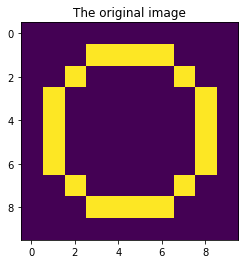

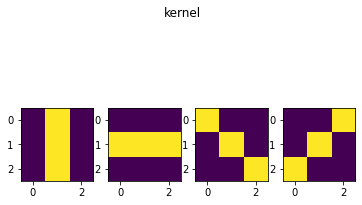

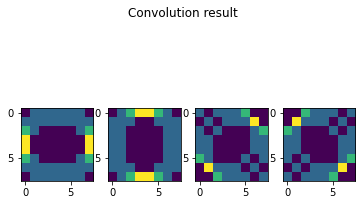

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 아주 간단한 합성곱층을 정의합니다.
class Conv:
  # W는 3x3으로 고정하고 이후 다룰 strides나 padding은 고려x
  def __init__(self,W):
    self.W = W
  def f_prop(self,X):
    out = np.zeros((X.shape[0]-2, X.shape[1]-2))
    for i in range(out.shape[0]):
      for j in range(out.shape[1]):
        x = X[i:i+3, j:j+3]
        # 각 요소별 곱의 합계
        out[i,j] = np.dot(self.W.flatten(), x.flatten())
    return out

local_filename, headers=urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

# 커널을 적절하게 설정
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

plt.subplot(1,4,1); plt.imshow(W1)
plt.subplot(1,4,2); plt.imshow(W2)
plt.subplot(1,4,3); plt.imshow(W3)
plt.subplot(1,4,4); plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

# 합성곱
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

### 21.2.4 CNN 구현

1. 모델을 관리하는 인스턴스 만들기 - Sequential()

```
model = Sequential()
```

2. 모델의 층을 하나씩 추가 - add()메서드
```
model.add(Dense(128))    # 전결합층
model.add(Conv2D(filters=64, kernel_size=(3,3)))    # 합성곱층
model.add(MaxPooling2D(pool_size=(2,2)))        # 풀링층
```

3. 컴파일

```
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])
```

4. 모델의 구조 출력

```
model.summary()
```



### 21.2.5 CNN을 이용한 분류(MNIST)

MNIST : 필기체 숫자의 데이터셋
* 각 이미지는 크기가 28X28 픽셀
* 1채널(흑백)의 데이터
* 각각 0~9의 클래스 라벨

### 21.2.6 CNN을 이용한 분류(cifar10)

cifar10 : 10종류의 개체가 있는 이미지 데이터셋

* 각 이미지는 32X32 픽셀
* 3채널(R,G,B)의 데이터
* 각각 0~9의 클래스 라벨(0 비행기/ 1 자동차 / 2 새 / 3 고양이 / 4 사슴 / 5 개 / 6 개구리 / 7 말 / 8 선박 / 9 트럭)

## 21.3 하이퍼파라미터

### 21.3.1 filters(합성곱층)

합성곱층의 **filters** 파라미터 : 특징 맵의 수(추출한 특징의 종류) 지정
* filters가 너무 작아서 필요한 특징을 추출하지 못하면 학습을 잘 진행되지 x
* filters가 너무 크면 과학습하기 쉬워

### 21.3.2 kernel_size(합성곱층)

합성곱층의 **kernel_size** 파라미터 : 커널의 크기 지정

* kernel_size가 너무 작으면 극히 작은 특징도 검출할 수 없게 되어 제대로 학습x
* kernel_size가 너무 크면 원래 작은 특징의 모임으로 검출될 예정이었던 큰 특징까지 검출 
   
   -> 계층 구조 파악에 자신 있는 신경망 모델의 강점을 살리지 못하고 비효율적인 모델이 되어버린다

### 21.3.3 strides(합성곱층)

합성곱층의 **strides** 파라미터 : 특징을 추출하는 간격, 즉 커널을 이동하는 거리 지정

* strides가 작을수록 세부적인 특징량을 추출할 수 있다 

   but 이미지 내의 동일한 위치에 같은 특징을 여러 번 감지해버리는 등 불필요한 계산 많아질 수 있다

* 일반적으로 strides는 작은 편이 좋다고 여겨져 -> Keras의 Conv2D층에서 기본적으로 (1,1)

### 21.3.4 padding(합성곱층)

**padding(패딩)** : 입력 이미지의 주변을 0으로 채우는 것

장점
* 가장자리 데이터의 특징도 잘 고려돼
* 데이터 갱신 빈도가 올라가
* 각 층의 입출력 유닛 수를 조정 가능

Keras의 Conv2D 층에서 패딩 방법 지정
> * padding=valid : 패딩 수행되지 않아
> * padding=same : 출력되는 특징 맵이 입력 크기와 일치하도록 입력에 패딩 수행

### 21.3.5 pool_size(풀링층)

풀링층의 **pool_size** 파라미터 : 풀링의 거칠기를 지정하는 파라미터
* pool_size를 크게 하면 위치에 대한 견고성(강건성)이 상승
* 기본적으로 pool_size는 2X2로 하면 좋다고 알려짐

### 21.3.6 strides(풀링층)

풀링층의 **strides** 파라미터 : 특징 맵을 풀링하는 간격 지정
* Keras의 Conv2D층에서 기본적으로 pool_size와 일치하도록

### 21.3.7 padding(풀링층)

풀링층의 **padding** 파라미터 : 패딩 방식 지정

Keras의 MaxPooling2D 층에서 패딩 방법 지정

> * padding=valid : 패딩 수행되지 않아
> * padding=same : 출력되는 특징 맵이 입력 크기와 일치하도록 입력에 패딩 수행

In [ ]:
# 연습문제

from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

# 모델 정의
# 인스턴스 작성
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                 filters=32,
                 kernel_size=(2,2),
                 strides=(1,1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(1,1)))
model.add(Conv2D(filters=32,
                 kernel_size=(2,2),
                 strides=(1,1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(1,1)))
model.add(Flatten())
model.add(Dense(256))

model.add(Activation('sigmoid'))
model.add(Dense(128))

model.add(Activation('sigmoid'))
model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 256)               5

# ch22. CNN을 이용한 이미지 인식 응용

## 22.1 데이터 부풀리기

### 22.1.1 ImageDataGenerator

이미지 인식에는 이미지 데이터 및 그에 대응하는 라벨의 조합이 대량으로 필요

-> 데이터 수를 충분한 양으로 늘릴 때 이미지 부풀리기 활용

* 단순히 복사해 양을 늘리는 것x, 이미지를 뒤집거나 좌우로 조금씩 이동시켜 새로운 데이터 만들어

Keras의 **ImageDataGenerator** 사용해 패딩 실시
* ImageDataGenerator에는 여러 인수가 있어 다양한 방법으로 데이터를 쉽게 가공 가능 / 복수의 가공법을 조합하여 새로운 이미지 생성 가능

 + rotation_range : 회전하는 범위(단위 : degree)
 + width_shift_range : 수평 이동하는 범위(이미지의 가로폭에 대한 비율)
 + heigth_shift_range : 수직 이동하는 범위(이미지의 세로폭에 대한 비율)
 + shear_range : 전단(shearing) 범위. 크게 하면 더 비스듬하게 찌그러진 이미지가 됨(단위 : degree)
 + zoom_range : 이미지를 확대/축소시키는 비율(최소 : 1-zoom_range, 최대 : 1+zoom_range)
 + channel_shift_range : 입력이 RGB3 채널인 이미지의 경우 R,G,B 각각에 임의의 값을 더하거나 뺄 수 있음(0~255)
 + horizontal_flip : True로 설정 시 가로로 반전
 + vertical_flip : True로 설정 시 세로로 반전

## 22.2 정규화

### 22.2.1 다양한 정규화 방법

**정규화** : 규칙에 따라 데이터를 처리하고, 사용하기 쉽게 하는 것
* 학습 효율을 크게 높일 수 있다
* 간단한 모델을 사용하는 경우에 매우 유용
* 정규화 방법

   : 배치 정규화(BN), 주성분 분석(PCA), 특잇값 분해(SVD), 제로위상 성분 분석(ZCA), 국소 응답 정규화(LRN), 전역 콘트라스트 정규화(GCN), 국소 콘트라스트 정규화(LCN)

   => 크게 표준화와 백색화로 나눌 수 있다 

### 22.2.2 표준화

**표준화** : 개별 특징에 대해 평균을 0으로, 분산을 1로 하여 특징별 데이터 분포를 좁히는 방법

* 가중치 붙음으로써 숨은 특징을 찾기 쉬워져

### 22.2.3 백색화

**백색화** : 데이터 성분 사이의 상관관계를 없애는 방법

* 정보량이 적은 면이나 배경 등이 아니라 정보량이 많은 가장자리 등을 강조함으로써 학습효율을 높일 수 있다

### 22.2.4 배치 정규화

**배치 정규화** : 미니배치 학습을 통해 배치마다 표준화를 수행하는 것

* model의 add() 메서드로 모델에 배치 정규화 통합 가능



```
model.add(BatchNormalization())
```

* 데이터의 전처리뿐만 아니라 중간층의 출력에도 적용 가능
* 출력값의 범위가 한정되지 않은 함수의 출력에 사용 시 학습이 원활하게 진행되어 큰 효과 발휘

## 22.3 전이학습

대규모 신경망을 학습시키는 데에 매우 많은 시간 소요, 데이터 대량 필요

**전이학습** : 학습된 모델을 이용하여 새로운 모델을 학습시키는 것

* VGG16 모델

: 작은 필터를 사용한 합성곱을 2~4회 연속으로 실시하여 풀링을 반복하는 당시로서는 상당히 층을 깊게 한 것이 특징

: VGG16(가중치 가진 층 16층 거듭), VGG19(19층 거듭)

 : 입력 이미지의 크기 신경 쓸 필요x

### 22.3.1 VGG16

1. VGG 모델 만들기



```
from keras.applications.vgg16 import VGG16

input_tensor = Input(shape=(32,32,3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
```

* input_tensor : 입력 형태 부여
* include_top : 원래 모델의 최후 전결합층을 사용할지 여부
* weights : imagenet을 지정하면 ImageNet에서 학습한 가중치 사용 / None 지정하면 임의의 가중치 사용

2. 다른 모델 정의

특징 추출 부분 이후에 새로운 다른 층을 추가하기 위해 다른 모델 정의하고 결합

```
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

model = Model(inputs=vgg16.input, outputs=top_model)
```

3. 가중치 고정



```
# model의 19번째 층까지는 vgg모델
for layer in model.layers[:19]:
  layer.trainable = False
```


4. SGD로 최적화



```
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9, metrics=['accuracy'])
```



170508288/170498071 [==============================] - 3s 0us/step


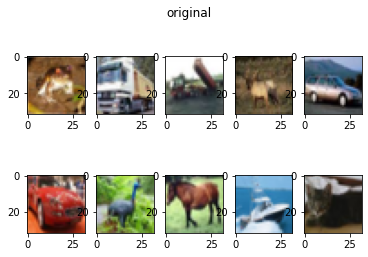

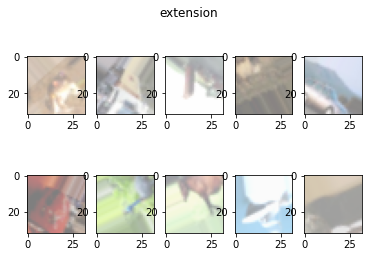

In [ ]:
# 연습문제

import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# 이미지 데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 이미지 표시
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
plt.suptitle('original',fontsize=12)
plt.show()

# 확장할 때의 설정 기술
generator = ImageDataGenerator(
    rotation_range=90,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    channel_shift_range=70.0,
    shear_range=0.39,
    horizontal_flip=True,
    vertical_flip=True
)

# 이미지 확장
extension = generator.flow(X_train, shuffle=False)
X_batch = extension.next()

# 생성한 이미지 보기 좋게 만들기
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 확장된 이미지 표시
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()